##Libraries to initialisation

In [3]:
import pandas as pd ##Library to read dataset
import numpy as np ##Array Library
from sklearn.model_selection import train_test_split  ##Data splitting library
from sklearn.ensemble import RandomForestRegressor   ##Model fitting library
from sklearn.metrics import r2_score  ##Accuracy verification
import seaborn as sns ##Data visualization on confussion matrix
import matplotlib.pyplot as plt ##Data visualization on  graph
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings  ##warning deletion

<module 'warnings' from 'C:\\ProgramData\\anaconda3\\Lib\\warnings.py'>

Reading the dataset

In [4]:
df=pd.read_csv('Laptop_price.csv')
print(df)

      Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
1      Acer         2.912833         4              1000    11.311372   
2    Lenovo         3.241627         4               256    11.853023   
3      Acer         3.806248        16               512    12.280360   
4      Acer         3.268097        32              1000    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  
2    2.029061   9291.023542  
3  

In [5]:
df.dropna()      ## Removing the empty Rows and Columns

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [6]:
df['Brand']=df['Brand'].astype('category')    ## Data conversion(Words into numbers)
df['Brand']=df['Brand'].cat.codes
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,0,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728334
4,0,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,3,3.343584,4,1000,12.587095,3.162399,31593.668017
996,2,2.780555,8,256,12.679356,3.750265,9149.521832
997,2,3.200569,4,512,12.666315,3.392612,16552.404779
998,1,1.604182,8,256,11.215581,3.857613,9407.473459


In [7]:
df.isnull().sum()  ##TO check  the null elements

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [8]:
x=df[['Brand','Processor_Speed','RAM_Size','Storage_Capacity','Screen_Size','Weight']]    ##Independent variables
y=df[['Price']]    ##Dependent variable

Data splitting

In [9]:
x=df[['Brand','Processor_Speed','RAM_Size','Storage_Capacity','Screen_Size','Weight']] 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
29,1,3.799639,8,1000,12.853007,2.151678
535,0,3.298004,16,512,15.144079,2.587267
695,3,2.433129,4,512,15.046398,2.264456
557,0,3.313144,32,512,12.836309,2.376126
836,3,3.162279,16,512,14.701664,2.943887
...,...,...,...,...,...,...
106,4,1.953589,32,256,14.320274,3.534916
270,4,2.096943,16,1000,14.492863,4.989697
860,2,2.884506,4,1000,11.458639,4.942381
435,1,2.074887,4,256,15.417373,2.991174


##Model fitting

In [10]:
loaded_model=RandomForestRegressor(n_estimators=100, random_state=42)
loaded_model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [11]:
y_pred = loaded_model.predict(x_test)
print(y_pred)

[10556.56069973 31452.20637296  9673.53314127  9229.8404146
 32005.86795946 31558.06968762 10637.86647014 16865.54751472
 18568.72347603 32348.48026705  9979.89771152 10739.45568268
 32934.94350504  9243.09700621 17131.16669138  9084.95211222
 32116.52432538 32255.28083675 10533.54785981 31769.40666345
 10545.43580467 10797.29901485  9139.50122864 10561.81917196
  9550.42303735 17649.84916419 10659.66336837 18250.0843629
 10794.88615683 32597.63878627 16721.47393011 32762.88047356
 16657.61676068 32026.06138902 31681.18896018 10336.79116704
 31280.38944619  9074.50245939 32621.27964228 17320.18315218
 32049.21818858  9661.8562242  17690.39488002 31667.26006873
 17262.7526021  16825.39262389 32730.81664877 16888.81693688
  9741.52751196 17065.33657468 16736.84706623 31377.87709769
  9730.79214987 10490.43676243 32033.723022   32908.123002
 31441.87651323 31634.23749323  9137.63502156 32347.00879687
 17561.20064842 31488.18334177 31822.80609694 10788.0735261
  9728.94847324 32010.7157992

In [12]:
print('Acuracy:',(r2_score(y_test, y_pred))*100)  ##Accuracy verification

Acuracy: 99.95419747164364


##Prediction

In [13]:
new_laptop=pd.DataFrame([{
    'Brand':1,
    'Processor_Speed':3.830296,
    'RAM_Size':16,
    'Storage_Capacity':512,
    'Screen_Size':11.185147,
    'Weight':2.641094,
}])
predicted_price=loaded_model.predict(new_laptop)
print('The_predicted_price_for_new_laptop:',predicted_price[0])

The_predicted_price_for_new_laptop: 17488.423057529013


##Data visualization on graph

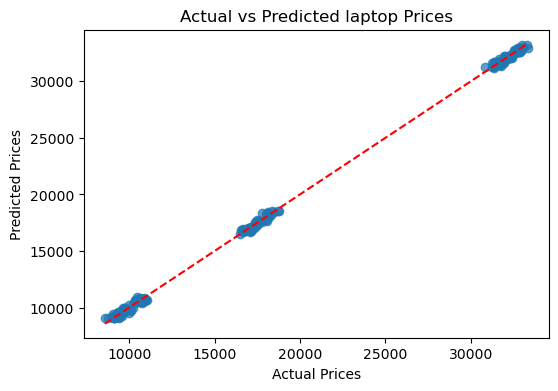

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted laptop Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

##Data visualization according to the important feature

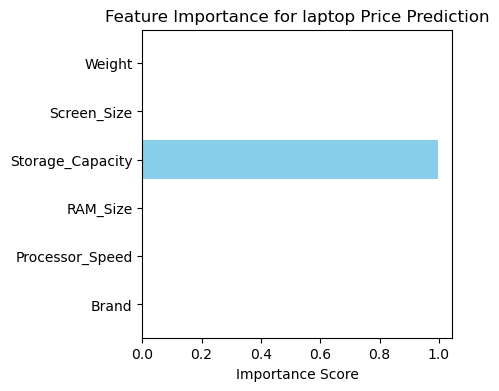

Brand: 0.0000
Processor_Speed: 0.0004
RAM_Size: 0.0035
Storage_Capacity: 0.9958
Screen_Size: 0.0001
Weight: 0.0001


In [15]:
importances = loaded_model.feature_importances_
features = x.columns

plt.figure(figsize=(4,4))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.title("Feature Importance for laptop Price Prediction")
plt.show()

for feat, score in zip(features, importances):
    print(f"{feat}: {score:.4f}")

# 10. --- Matrix Visualization (confusion matrix ) ---
results_df = pd.DataFrame({
    "Actual": y_test.values.ravel() if hasattr(y_test, "values") else y_test.ravel(),
    "Predicted": y_pred.ravel()
})

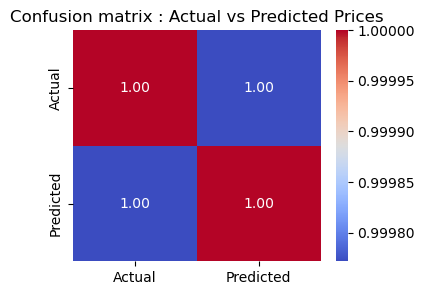

In [16]:
plt.figure(figsize=(4,3))
sns.heatmap(results_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Confusion matrix : Actual vs Predicted Prices")
plt.show()

##Model saving

In [17]:
import pickle

In [18]:
laptop_sales_data=loaded_model
with open('Gedeon_laptop_price_prediction.pkl','wb') as file:
    pickle.dump( loaded_model,file)
    print('model saved are succesfull')

model saved are succesfull


In [19]:
new_laptop=pd.DataFrame([{
    'Brand':1,
    'Processor_Speed':3.830296,
    'RAM_Size':16,
    'Storage_Capacity':512,
    'Screen_Size':11.185147,
    'Weight':2.641094,
}])

In [24]:
predicted_price = loaded_model.predict(new_laptop)
print("Predicted Price for new_laptop in $ :", predicted_price[0])

Predicted Price for new_laptop in $ : 17488.423057529013


In [21]:
prediction = loaded_model.predict(new_laptop)
print(prediction)

[17488.42305753]
